# 时间序列预测算法：fbprophet（先知）

In [19]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
df = pd.read_csv('file/AirPassengers.csv')

df.head(10)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [21]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [22]:
# 将 month类型转为datetime类型
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [23]:
# prophet 强调了输入列被命名为ds(时间列)和y（指标列）的严格条件，需要重新命名DataFrame中的列
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})
df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


###  绘制航空数据的图像

Text(0.5, 0, 'Date')

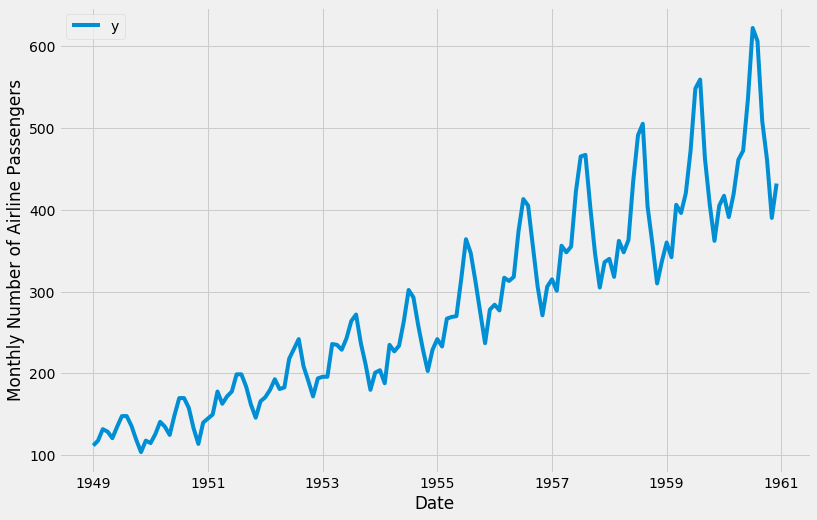

In [25]:
# from stackoverflow solve the problem
pd.plotting.register_matplotlib_converters()

ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')


### 使用先知的时间序列预测 

In [26]:
# 实例化一个先知对象，设置interval_width参数来指定不确定性间隔的期望范围
my_model = Prophet(interval_width = 0.95)

In [28]:
# 使用df作为训练数据集来训练我们的模型
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


为了获得我们要的时间序列的预测，我们必须向prophet提供一个新的DataFrame，其中
包含一个ds列，该列包含我们需要预测的日期，prophet提供了帮助的函数，来构建这样一个DataFrame

In [29]:
# 指示prophet生成36个日期戳，频率是ms(月初)，所以下面的代码是预测未来三年时间序列的未来价值
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [30]:
# 将未来日期的dataframe作为predict方法的输入
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.511816,608.047059,693.205521
176,1963-09-01,601.983199,558.536220,645.397224
177,1963-10-01,565.980192,519.509039,609.518478
178,1963-11-01,534.021253,490.898608,580.022995
179,1963-12-01,563.611828,522.340638,606.435517


#### 对以上的代码进行解释
* ds : 预测值的日期戳
* yhat: 度量的预测值
* yhat_lower: 预测的下限
* yhat_upper: 预测的上限

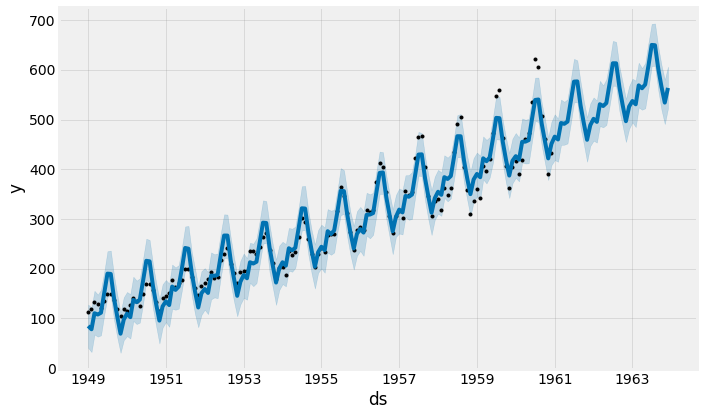

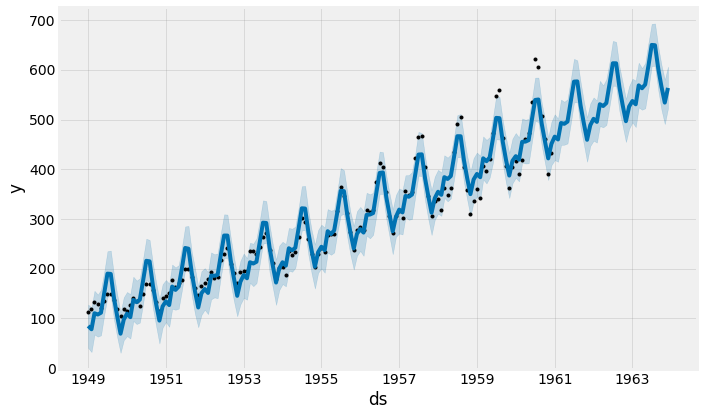

In [31]:
# 绘制我们预测的结果
my_model.plot(forecast,uncertainty=True)

#### 对于以上图像的解释
prophet 绘制了
* 时间序列（黑点），
* 预测值（蓝线），
* 预测的不确定性间隔的观测值（蓝色阴影区域）

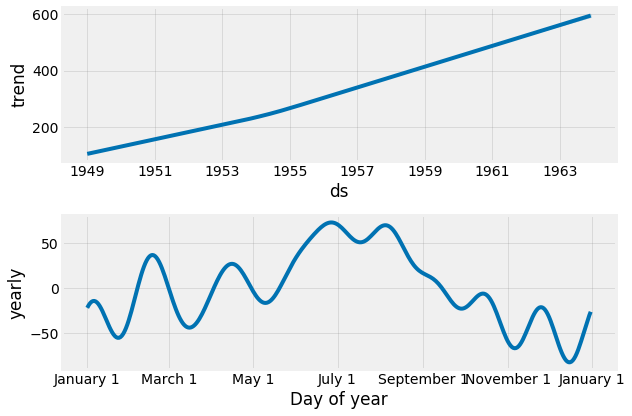

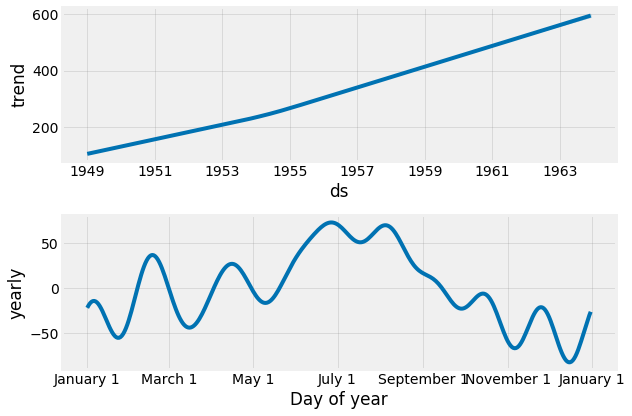

In [33]:
# 返回我们预测的组成部分，帮助我们揭示时间序列的每日，每周、每年的模式是如何帮助
# 总体预测的结果的
my_model.plot_components(forecast)


参考连接：https://www.howtoing.com/a-guide-to-time-series-forecasting-with-prophet-in-python-3

推荐阅读：https://cloud.tencent.com/developer/article/1119611